In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller



In [8]:
df= pd.read_csv('train.csv', encoding='latin1')
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)
print(list(df.columns))
#CSV INFO
# Rows - 3000888
# Columns - 6
# Columns - id , date, store_nbr, family, sales , onpromotion
# Price = UnitPrice * Quantity


   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+

In [11]:
df = pd.read_csv(
    'train.csv',
    encoding='latin1',
    parse_dates=['date']
)
print(df.dtypes)

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object


In [12]:
monthly_df = (
    df
    .set_index('date')
    .resample('MS')['sales']
    .sum()
    .reset_index()
    .rename(columns={'date': 'ds', 'sales': 'y'})
)

print(monthly_df.head())
print(len(monthly_df))


          ds             y
0 2013-01-01  1.032762e+07
1 2013-02-01  9.658960e+06
2 2013-03-01  1.142850e+07
3 2013-04-01  1.099346e+07
4 2013-05-01  1.159770e+07
56


In [14]:
parse_dates=['date']
df.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

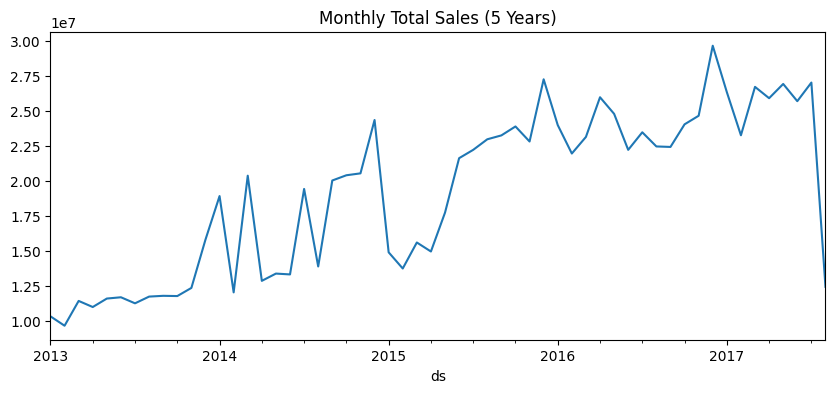

In [15]:
monthly_df.set_index('ds')['y'].plot(
    figsize=(10,4),
    title="Monthly Total Sales (5 Years)"
)
plt.show()

In [26]:
monthly_df['ds'].max()
monthly_df = monthly_df[monthly_df['ds'] <= '2017-05-01']



<Axes: title={'center': 'Monthly Sales (Trimmed to Complete Months)'}, xlabel='ds'>

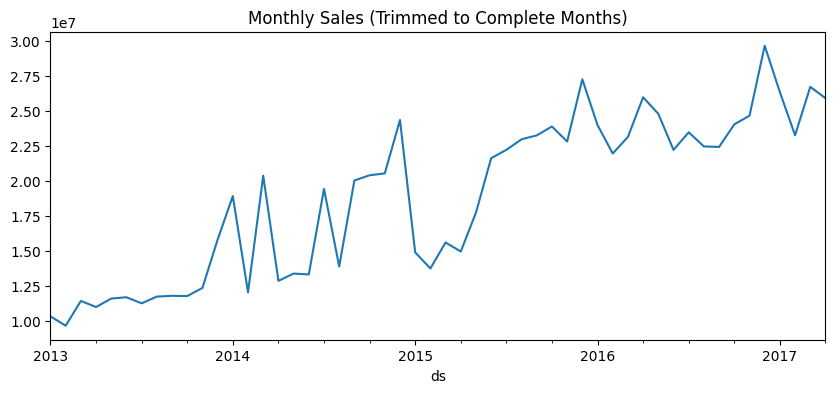

In [27]:
monthly_df.set_index('ds')['y'].plot(
    figsize=(10,4),
    title="Monthly Sales (Trimmed to Complete Months)"
)


In [28]:
from pmdarima import auto_arima

sarima_model = auto_arima(
    monthly_df['y'],
    seasonal=True,
    m=12,
    d=1,
    D=1,
    trace=True,
    suppress_warnings=True,
    stepwise=True
)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1296.929, Time=0.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1309.396, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1299.507, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1295.043, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1302.613, Time=0.01 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1296.738, Time=0.12 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1296.385, Time=0.09 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1300.740, Time=0.03 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1297.259, Time=0.14 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.05 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1295.290, Time=0.05 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1295.805, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1293.380, Time=0.03 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1301.849, Time=0.01 sec
 ARIMA(1,1,0)(1,1,1)[12]

In [33]:
n_periods = 12 # or 12

forecast = sarima_model.predict(n_periods=n_periods)

forecast_df = pd.DataFrame({
    'ds': pd.date_range(
        start=monthly_df['ds'].max() + pd.offsets.MonthBegin(1),
        periods=n_periods,
        freq='MS'
    ),
    'value': forecast,
    'type': 'Forecast'
})
print(forecast_df)

           ds         value      type
52 2017-05-01  2.643739e+07  Forecast
53 2017-06-01  2.641218e+07  Forecast
54 2017-07-01  2.799529e+07  Forecast
55 2017-08-01  2.693725e+07  Forecast
56 2017-09-01  2.803591e+07  Forecast
57 2017-10-01  2.882946e+07  Forecast
58 2017-11-01  2.886401e+07  Forecast
59 2017-12-01  3.284313e+07  Forecast
60 2018-01-01  3.065669e+07  Forecast
61 2018-02-01  2.812261e+07  Forecast
62 2018-03-01  3.095356e+07  Forecast
63 2018-04-01  3.036272e+07  Forecast


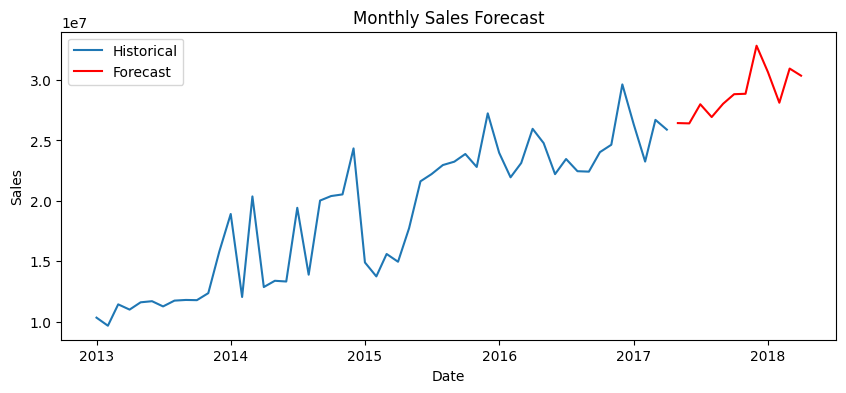

In [34]:
#Forecast Visualization
plt.figure(figsize=(10,4))
plt.plot(monthly_df['ds'], monthly_df['y'], label='Historical')
plt.plot(forecast_df['ds'], forecast_df['value'], label='Forecast', color='red')
plt.title('Monthly Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [41]:
test_df = pd.read_csv('test.csv', encoding='latin1', parse_dates=['date'])
print(test_df.head())

        id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0


In [46]:
cutoff_date = "2017-06-01"

train_part = df[df['date'] < cutoff_date]
val_part   = df[df['date'] >= cutoff_date]


In [47]:
train_monthly = (
    train_part
    .groupby(pd.Grouper(key='date', freq='MS'))['sales']
    .sum()
    .reset_index()
    .rename(columns={'date': 'ds', 'sales': 'y'})
)

val_monthly = (
    val_part
    .groupby(pd.Grouper(key='date', freq='MS'))['sales']
    .sum()
    .reset_index()
    .rename(columns={'date': 'ds', 'sales': 'y'})
)


In [48]:
n_val = len(val_monthly)

forecast = sarima_model.predict(n_periods=n_val)

forecast_df = pd.DataFrame({
    'ds': val_monthly['ds'],
    'yhat': forecast
})


In [51]:
comparison_df = val_monthly.merge(forecast_df, on='ds')


In [52]:
print(comparison_df)
print(comparison_df.isna().sum())


          ds             y  yhat
0 2017-06-01  2.568282e+07   NaN
1 2017-07-01  2.701148e+07   NaN
2 2017-08-01  1.243332e+07   NaN
ds      0
y       0
yhat    3
dtype: int64


In [54]:
n_val = val_monthly.shape[0]

forecast = sarima_model.predict(n_periods=n_val)
comparison_df = (
    val_monthly
    .merge(forecast_df, on='ds', how='inner')
)

In [57]:
comparison_df[comparison_df.isna().any(axis=1)]
comparison_df.isna().sum()


ds      0
y       0
yhat    3
dtype: int64

In [62]:
val_monthly['ds'] = pd.to_datetime(val_monthly['ds']).dt.to_period('M').dt.to_timestamp()
forecast_df['ds'] = pd.to_datetime(forecast_df['ds']).dt.to_period('M').dt.to_timestamp()
comparison_df = val_monthly.merge(forecast_df, on='ds', how='inner')
comparison_df.isna().sum()


ds      0
y       0
yhat    3
dtype: int64

In [64]:
comparison_df = comparison_df.dropna()
comparison_df.isna().sum()


ds      0
y       0
yhat    0
dtype: int64

In [65]:
assert comparison_df.isna().sum().sum() == 0


In [77]:
test_monthly = pd.read_csv('test.csv', encoding='latin1', parse_dates=['date'])
test_monthly = test_monthly.rename(columns={'date': 'ds', 'sales': 'y'})
print(test_monthly['ds'].min(), test_monthly['ds'].max())
print(forecast_df['ds'].min(), forecast_df['ds'].max())


2017-08-16 00:00:00 2017-08-31 00:00:00
2017-06-01 00:00:00 2017-08-01 00:00:00


In [ ]:
test_monthly = (
    test_df
    .groupby(pd.Grouper(key='ds', freq='MS'))['y']
    .sum()
    .reset_index()
)
print(test_monthly.head())
print(test_monthly['ds'].min(), test_monthly['ds'].max())

KeyError: 'Column not found: y'

In [73]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(comparison_df['y'], comparison_df['yhat'])
mape = (abs(comparison_df['y'] - comparison_df['yhat']) / comparison_df['y']).mean() * 100

print(f"MAE: {mae:,.0f}")
print(f"MAPE: {mape:.2f}%")



ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.